In [2]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from continuous_prediction.algo.arima import rolling_forecast, train_model
from continuous_prediction.algo.common.data_processor import create_split, create_df
from continuous_prediction.algo.common.eval_metrics import mape
from continuous_prediction.algo.common.parameter_tuning import adfuler_test, shift_series
from matplotlib import pyplot
import pandas as pd

In [3]:
data_file_path = "../../data/Data.csv"
column_name = 'GDP_CVM'

In [4]:
# load data
df = pd.read_csv(data_file_path, delimiter=',', index_col=0)
series = df[column_name]

print(f'length of series: {len(series)}')

length of series: 91


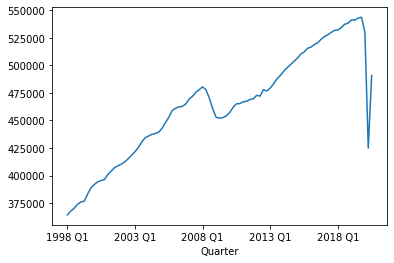

ADF Statistic: -2.0607126616377376
p-value: 0.2606027153634045
Critical Values:
	1%: -3.506057133647011
	5%: -2.8946066061911946
	10%: -2.5844100201994697


In [12]:
# parameter extraction

# plot series
series.plot()
pyplot.show()

adfuler_test(series)
# if p=value# if p-value>0.05 -> Accept NULL hypothesis -> not stationary -> shift series to be stationary

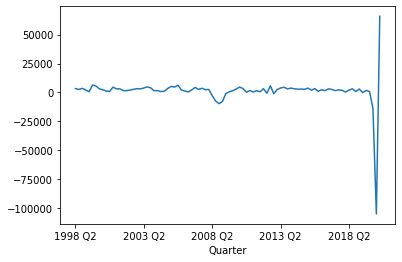

ADF Statistic: -12.000835873745045
p-value: 3.349629603751532e-22
Critical Values:
	1%: -3.506057133647011
	5%: -2.8946066061911946
	10%: -2.5844100201994697


In [13]:
series_new = shift_series(series, 1)
series_new = series_new.dropna()
series_new.plot()
pyplot.show()

adfuler_test(series_new)
# d = 1

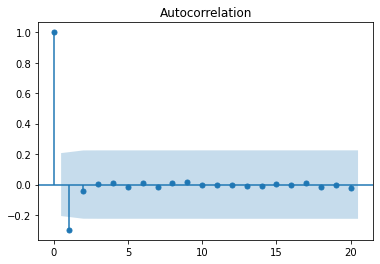

In [14]:
# Auto Correlation Function (ACF) to determine optimal number of MA terms (q)
x = plot_acf(series_new)

# q = 2

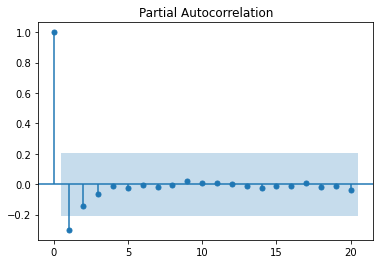

In [15]:
# Partial Auto Correlation Function (PACF) to determine the optimal number of terms to use in the AR model (p)
x = plot_pacf(series_new)

# p = 2

In [ ]:
# # load data
# df = load_data_with_index(data_file_path)
# train, test, series = create_split(df, args=data_args)
#
# print(f'train data: {len(train)}')
# print(f'test data: {len(test)}')

In [16]:
data_args = {
    'test_split': 0.3,
    'future_n': 1,
}

arima_args = {
    'p': 2,
    'd': 1,
    'q': 2,
}

result_file_path = "../../results/" + column_name + '-' + str(data_args['future_n']) + '.tsv'

In [17]:
# split data
train, test = create_split(series, args=data_args)

print(f'train data: {len(train)}')
print(f'test data: {len(test)}')


train data: 64
test data: 27


In [18]:
# Rolling forecast for model validation
predictions = rolling_forecast(train, test, data_args, arima_args)

# Evaluation
error = mean_squared_error(test, predictions)
print('Test MSE: %.6f' % error)
rmse1 = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.6f' % rmse1)
mape_val = mape(test, predictions)
print('Test MAPE: %.6f' %mape_val)

# future predictions
model_fit = train_model(series, arima_args)
output = model_fit.predict(start=len(series),end=len(series)+data_args['future_n']-1,dynamic=True, typ='levels')
predictions.extend(output)

result_df = create_df(test.index.values.tolist(), test.values.tolist(), predictions)
result_df.to_csv(result_file_path, sep='\t', encoding='utf-8', index=True)

print(result_df.head())


c:\users\hansi\anaconda3\envs\economic-prediction\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\hansi\anaconda3\envs\economic-prediction\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\hansi\anaconda3\envs\economic-prediction\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\hansi\anaconda3\envs\economic-prediction\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\hansi\anaconda3\envs\economic-prediction\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization faile

Test MSE: 598086876.736730
Test RMSE: 24455.814784
Test MAPE: 0.017511
['2020 Q4']
         Original     Prediction
Time                            
2014 Q1  494629.0  491838.822179
2014 Q2  497849.0  495663.429587
2014 Q3  500658.0  499178.289937
2014 Q4  503589.0  501553.396318
2015 Q1  506314.0  505000.736465


<AxesSubplot:xlabel='Time'>

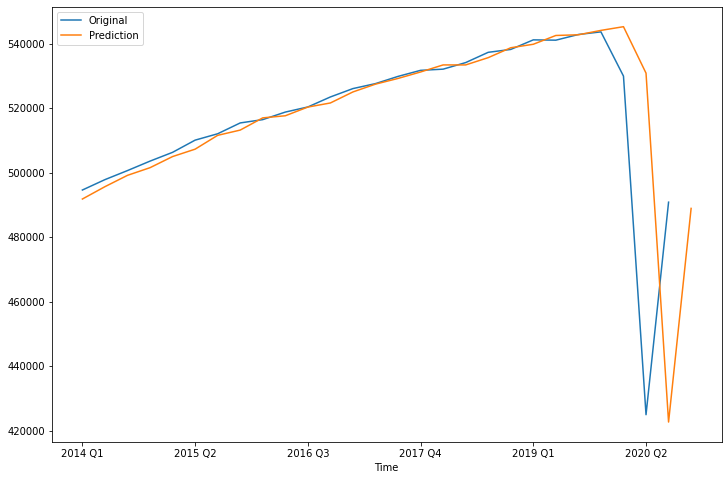

In [19]:
result_df[['Original', 'Prediction']].plot(figsize=(12,8))
# future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

Predict 2 future values

In [20]:
data_args = {
    'test_split': 0.3,
    'future_n': 2,
}

arima_args = {
    'p': 2,
    'd': 1,
    'q': 2,
}

result_file_path = "../../results/" + column_name + '-' + str(data_args['future_n']) + '.tsv'


In [21]:
# split data
train, test = create_split(series, args=data_args)

print(f'train data: {len(train)}')
print(f'test data: {len(test)}')

train data: 63
test data: 28


c:\users\hansi\anaconda3\envs\economic-prediction\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\hansi\anaconda3\envs\economic-prediction\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\hansi\anaconda3\envs\economic-prediction\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\hansi\anaconda3\envs\economic-prediction\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\hansi\anaconda3\envs\economic-prediction\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization faile

Test MSE: 473507150.303319
Test RMSE: 21760.219445
Test MAPE: 0.016145
['2020 Q4', '2021 Q1']
         Original     Prediction
Time                            
2013 Q4  490859.0  488480.351199
2014 Q1  494629.0  489670.144309
2014 Q2  497849.0  495663.429587
2014 Q3  500658.0  496698.231303
2014 Q4  503589.0  501553.396318


<AxesSubplot:xlabel='Time'>

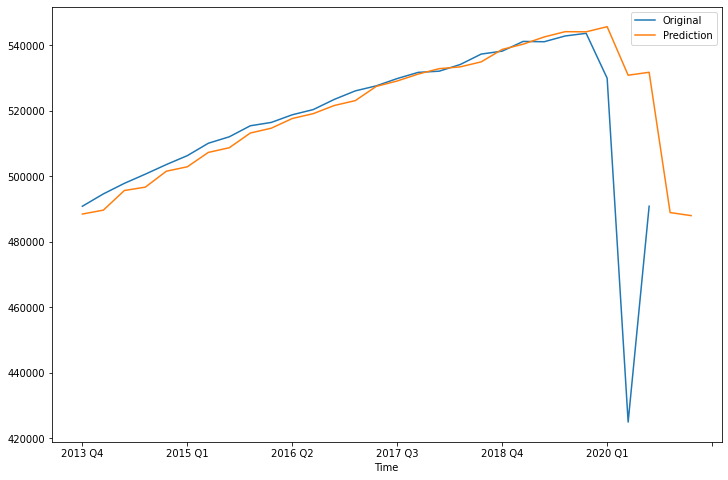

In [22]:
# Rolling forecast for model validation
predictions = rolling_forecast(train, test, data_args, arima_args)

# Evaluation
error = mean_squared_error(test, predictions)
print('Test MSE: %.6f' % error)
rmse1 = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.6f' % rmse1)
mape_val = mape(test, predictions)
print('Test MAPE: %.6f' %mape_val)

# future predictions
model_fit = train_model(series, arima_args)
output = model_fit.predict(start=len(series),end=len(series)+data_args['future_n']-1,dynamic=True, typ='levels')
predictions.extend(output)

result_df = create_df(test.index.values.tolist(), test.values.tolist(), predictions)
result_df.to_csv(result_file_path, sep='\t', encoding='utf-8', index=True)

print(result_df.head())

result_df[['Original', 'Prediction']].plot(figsize=(12,8))

Predict 3 future values

In [5]:
data_args = {
    'test_split': 0.3,
    'future_n': 3,
}

arima_args = {
    'p': 2,
    'd': 1,
    'q': 2,
}

result_file_path = "../../results/" + column_name + '-' + str(data_args['future_n']) + '.tsv'

In [6]:
# split data
train, test = create_split(series, args=data_args)

print(f'train data: {len(train)}')
print(f'test data: {len(test)}')

train data: 64
test data: 27


c:\users\hansi\anaconda3\envs\economic-prediction\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\hansi\anaconda3\envs\economic-prediction\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\hansi\anaconda3\envs\economic-prediction\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\hansi\anaconda3\envs\economic-prediction\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\hansi\anaconda3\envs\economic-prediction\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization faile

Test MSE: 684444573.137102
Test RMSE: 26161.891620
Test MAPE: 0.019828
['2020 Q4', '2021 Q1', '2021 Q2']
         Original     Prediction
Time                            
2014 Q1  494629.0  491838.822179
2014 Q2  497849.0  492786.031864
2014 Q3  500658.0  493724.411989
2014 Q4  503589.0  501553.396318
2015 Q1  506314.0  502909.616217


<AxesSubplot:xlabel='Time'>

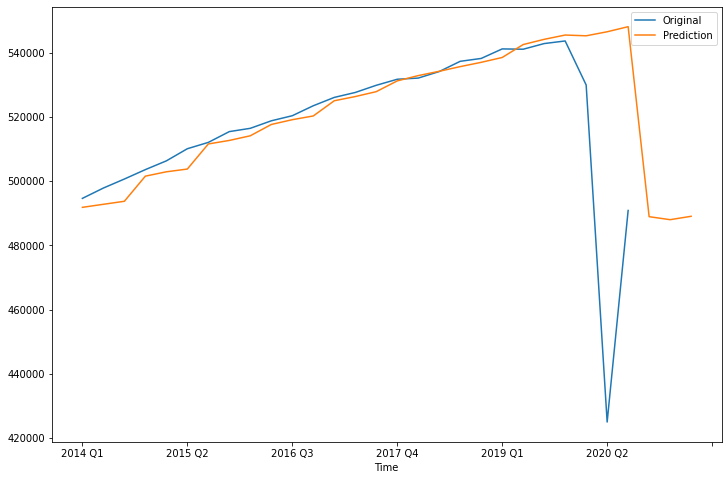

In [7]:
# Rolling forecast for model validation
predictions = rolling_forecast(train, test, data_args, arima_args)

# Evaluation
error = mean_squared_error(test, predictions)
print('Test MSE: %.6f' % error)
rmse1 = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.6f' % rmse1)
mape_val = mape(test, predictions)
print('Test MAPE: %.6f' %mape_val)

# future predictions
model_fit = train_model(series, arima_args)
output = model_fit.predict(start=len(series),end=len(series)+data_args['future_n']-1,dynamic=True, typ='levels')
predictions.extend(output)

result_df = create_df(test.index.values.tolist(), test.values.tolist(), predictions)
result_df.to_csv(result_file_path, sep='\t', encoding='utf-8', index=True)

print(result_df.head())

result_df[['Original', 'Prediction']].plot(figsize=(12,8))

In [ ]:
# predict

Predict 5 future values

In [8]:
data_args = {
    'test_split': 0.3,
    'future_n': 5,
}

arima_args = {
    'p': 2,
    'd': 1,
    'q': 2,
}

result_file_path = "../../results/" + column_name + '-' + str(data_args['future_n']) + '.tsv'


In [10]:

# split data
train, test = create_split(series, args=data_args)

print(f'train data: {len(train)}')
print(f'test data: {len(test)}')

train data: 66
test data: 25


c:\users\hansi\anaconda3\envs\economic-prediction\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\hansi\anaconda3\envs\economic-prediction\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\hansi\anaconda3\envs\economic-prediction\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\hansi\anaconda3\envs\economic-prediction\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\hansi\anaconda3\envs\economic-prediction\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization faile

Test MSE: 750521027.282091
Test RMSE: 27395.638837
Test MAPE: 0.022110
['2020 Q4', '2021 Q1', '2021 Q2', '2021 Q3', '2021 Q4']
         Original     Prediction
Time                            
2014 Q3  500658.0  499178.289937
2014 Q4  503589.0  500044.561912
2015 Q1  506314.0  501334.082935
2015 Q2  510095.0  502162.076408
2015 Q3  512070.0  503413.229086


<AxesSubplot:xlabel='Time'>

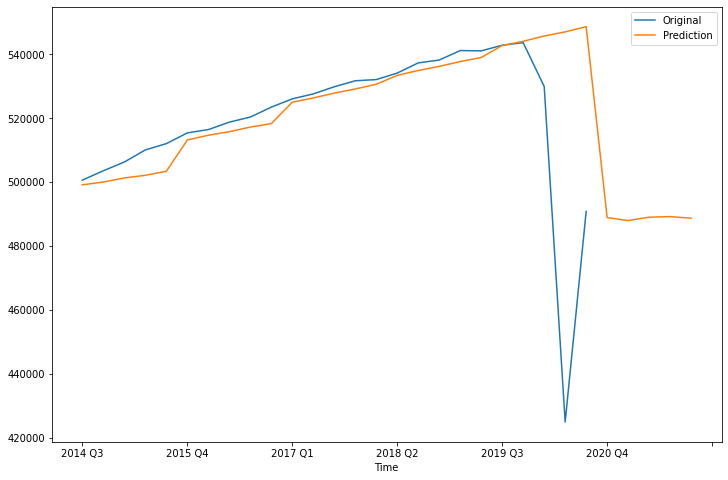

In [11]:

# Rolling forecast for model validation
predictions = rolling_forecast(train, test, data_args, arima_args)

# Evaluation
error = mean_squared_error(test, predictions)
print('Test MSE: %.6f' % error)
rmse1 = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.6f' % rmse1)
mape_val = mape(test, predictions)
print('Test MAPE: %.6f' %mape_val)

# future predictions
model_fit = train_model(series, arima_args)
output = model_fit.predict(start=len(series),end=len(series)+data_args['future_n']-1,dynamic=True, typ='levels')
predictions.extend(output)

result_df = create_df(test.index.values.tolist(), test.values.tolist(), predictions)
result_df.to_csv(result_file_path, sep='\t', encoding='utf-8', index=True)

print(result_df.head())

result_df[['Original', 'Prediction']].plot(figsize=(12,8))


Categorical visualisation

<AxesSubplot:xlabel='Quarter'>

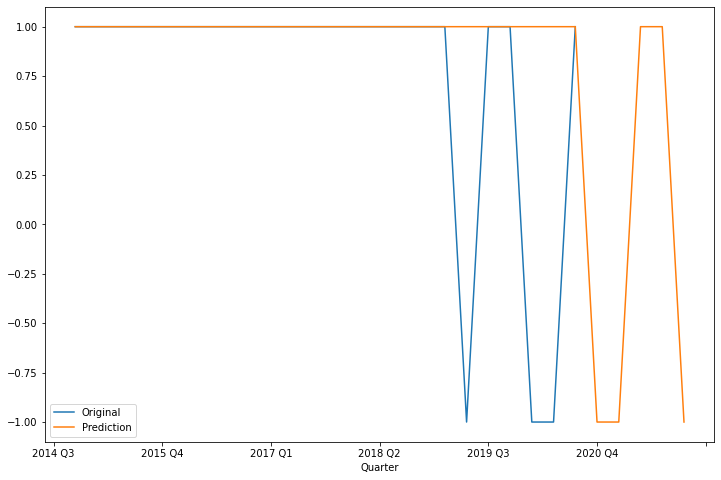

In [23]:
file_path = "../../results/ARIMA/GDP_CVM.csv"
# graph_data = load_data(file_path)
# graph_data.plot(kind='scatter', x='Quarter', y='LabelN', figsize=(24,8))

graph_data_with_index = pd.read_csv(file_path, delimiter=',', index_col=0)
graph_data_with_index[['Original', 'Prediction']].plot(figsize=(12,8))